# 결정트리(Decision Tree)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, random_state = 11
)

In [29]:
dtc = DecisionTreeClassifier(random_state = 1122)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1122)

- 모델 시각화 

In [5]:
from sklearn.tree import export_graphviz

In [30]:
export_graphviz(
    dtc, out_file= 'tree.dot', class_names = iris.target_names,
    feature_names = iris.feature_names, impurity = True, filled = True
)

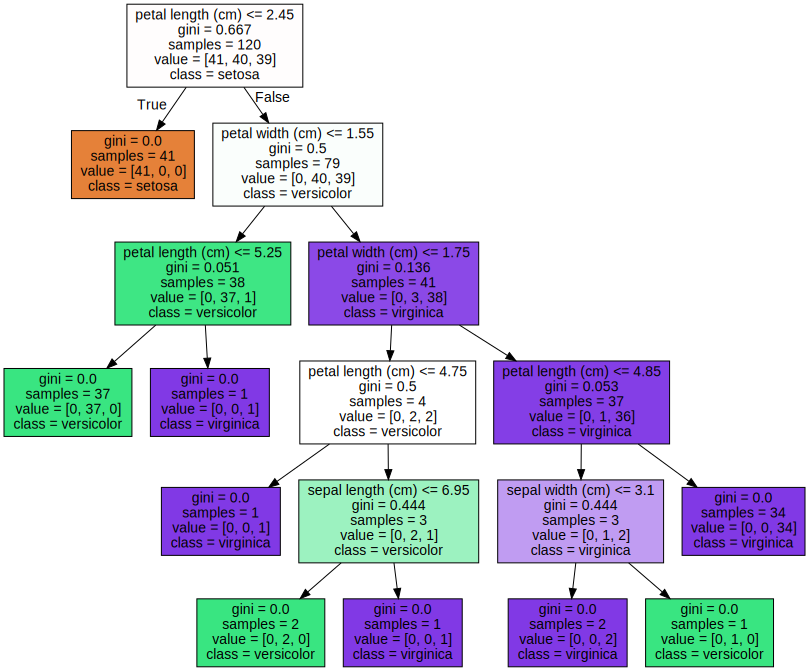

In [31]:
import graphviz
with open('tree.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

In [11]:
graphviz.__version__

'0.10.1'

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


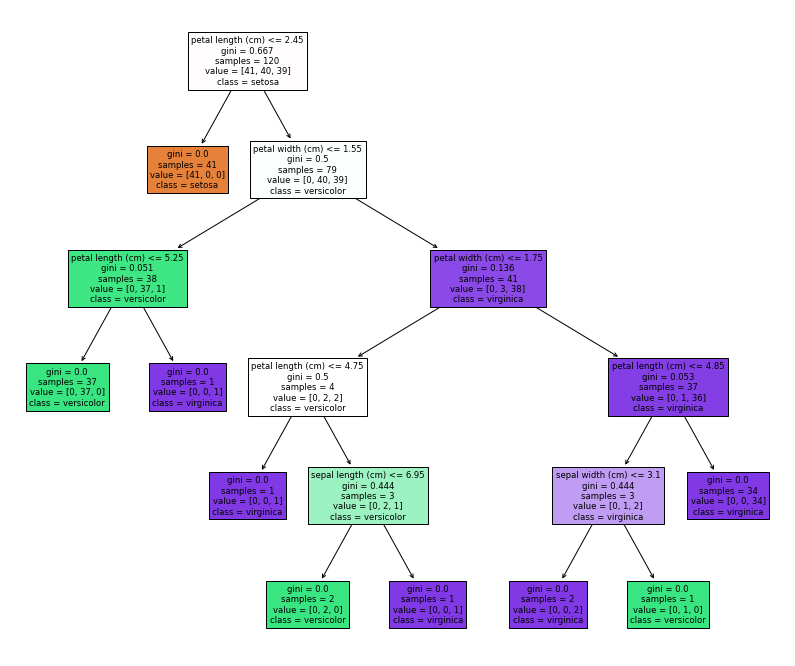

In [14]:
plt.figure(figsize = (14,12))
plot_tree(dtc, feature_names = iris.feature_names, class_names = iris.target_names,
          filled = True)
plt.show()

## 제약조건
- max_depth

In [16]:
dtc2 = DecisionTreeClassifier(random_state = 1122, max_depth = 3)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1122)

In [19]:
export_graphviz(
    dtc2, out_file= 'tree2.dot', class_names = iris.target_names,
    feature_names = iris.feature_names, impurity = True, filled = True
)

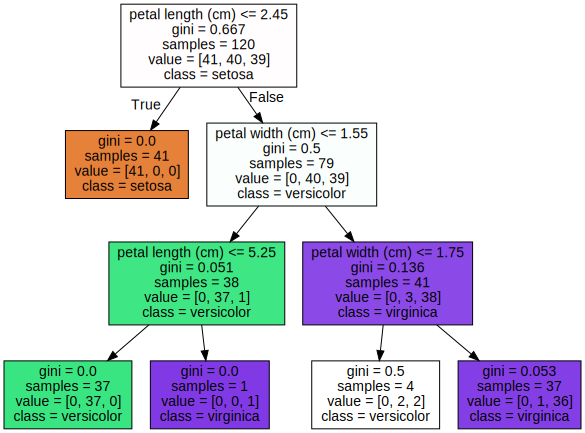

In [20]:
import graphviz
with open('tree2.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_split = 4

In [21]:
dtc3 = DecisionTreeClassifier(random_state = 1122, min_samples_split=4)
dtc3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=1122)

In [22]:
export_graphviz(
    dtc3, out_file= 'tree3.dot', class_names = iris.target_names,
    feature_names = iris.feature_names, impurity = True, filled = True
)

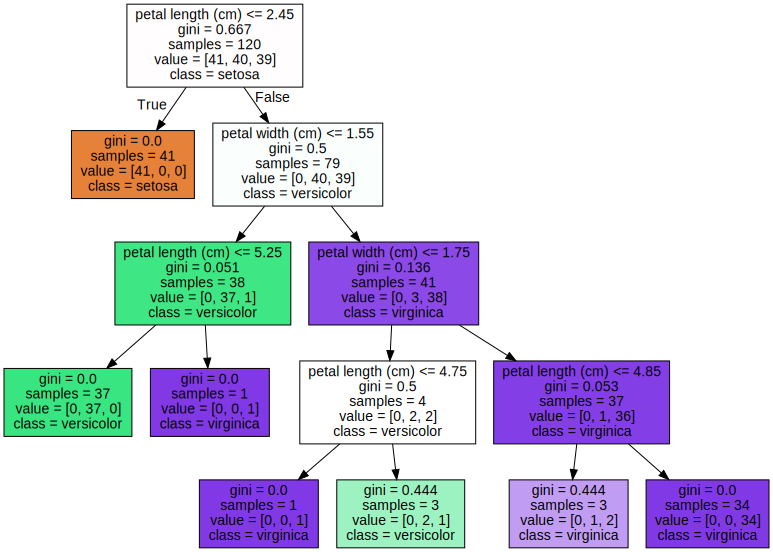

In [23]:
import graphviz
with open('tree3.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_leaf = 2

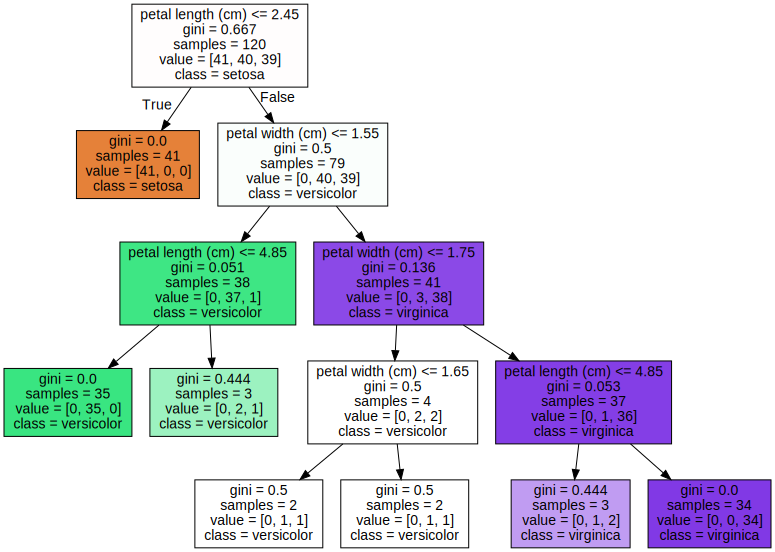

In [24]:
dtc4 = DecisionTreeClassifier(random_state = 1122, min_samples_leaf = 2)
dtc4.fit(X_train, y_train)
export_graphviz(
    dtc4, out_file= 'tree4.dot', class_names = iris.target_names,
    feature_names = iris.feature_names, impurity = True, filled = True
)
import graphviz
with open('tree4.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

### 모델 비교

In [33]:
dtc.score(X_test, y_test), dtc2.score(X_test, y_test), dtc3.score(X_test, y_test), dtc4.score(X_test, y_test)

(0.8666666666666667,
 0.9333333333333333,
 0.8666666666666667,
 0.9333333333333333)

### 학습된 모델이 제공하는 정보
- feature importance 가 중요ㅛ

In [32]:
dtc.feature_importances_

array([0.01667014, 0.01667014, 0.54656775, 0.42009198])

In [34]:
dtc2.feature_importances_

array([0.        , 0.        , 0.55810743, 0.44189257])

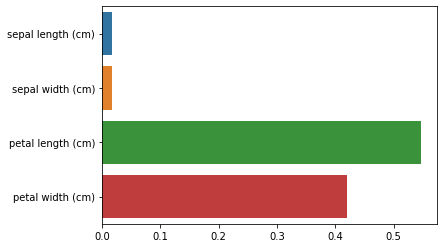

In [36]:
import seaborn as sns
sns.barplot(x = dtc.feature_importances_, y = iris.feature_names)
plt.show()